In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid", palette="deep")

In [78]:
transitions = pd.read_csv("./transitions.csv")
transitions["cumulative_reward"] = transitions["reward"].cumsum(axis=0)
transitions.describe()


,t,warehouse_num,factory_stock,warehouse_stock_0,warehouse_stock_1,production_level,shippings_to_warehouses_0,shippings_to_warehouses_1,reward,cumulative_reward
count,50.00000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,2.0,-120.414627,18.218063,27.858213,5.283761,5.186811,5.030340,-11710.533093,-190661.100829
std,14.57738,0.0,75.978041,4.340691,5.355489,3.041571,2.567457,3.124401,7584.255239,181976.653220
min,0.00000,2.0,-246.669519,2.054502,4.062346,0.009828,0.305307,0.140800,-24492.390320,-585526.654664
25%,12.25000,2.0,-191.332244,20.000000,28.446853,2.724070,2.735054,2.614826,-18300.533288,-323014.809910
50%,24.50000,2.0,-130.652820,20.000000,30.000000,5.863910,5.133567,5.735881,-12845.632732,-134967.579605
75%,36.75000,2.0,-47.223532,20.000000,30.000000,7.842634,7.125374,7.830164,-4610.263643,-28327.821068
max,49.00000,2.0,-1.540302,20.000000,30.000000,9.712826,9.840112,9.802591,-23.957796,-23.957796


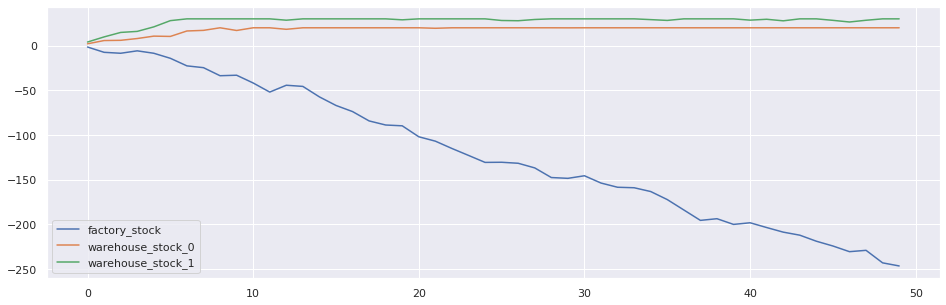

In [79]:
plt.figure(figsize=(16,5))
plt.plot(transitions["factory_stock"])
plt.plot(transitions["warehouse_stock_0"])
plt.plot(transitions["warehouse_stock_1"])

plt.legend(["factory_stock", "warehouse_stock_0", "warehouse_stock_1"])


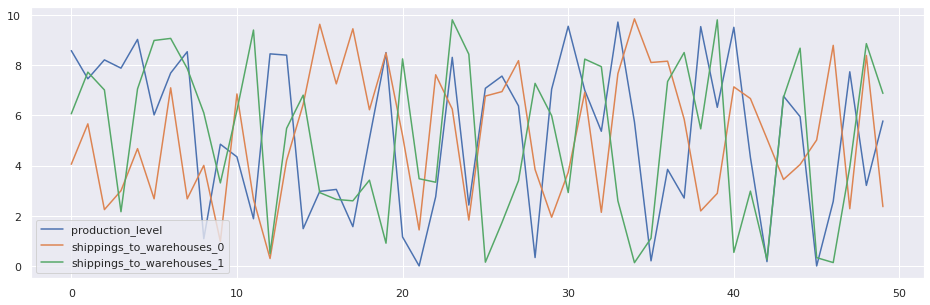

In [80]:
plt.figure(figsize=(16, 5))
plt.plot(transitions["production_level"])
plt.plot(transitions["shippings_to_warehouses_0"])
plt.plot(transitions["shippings_to_warehouses_1"])

plt.legend(["production_level", "shippings_to_warehouses_0",
           "shippings_to_warehouses_1"])


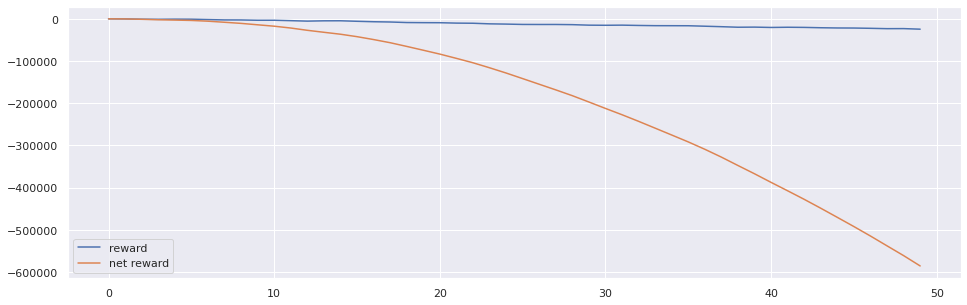

In [81]:
plt.figure(figsize=(16, 5))
plt.plot(transitions["reward"])
plt.plot(transitions["cumulative_reward"])
plt.legend(["reward", "net reward"])

In [83]:
costs = pd.read_csv("./costs.csv", names=['t', 'revenue', 'production_cost',
                    'storage_cost', 'penalty_cost', 'transportation_cost', 'reward'])
costs.describe()


,t,revenue,production_cost,storage_cost,penalty_cost,transportation_cost,reward
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,360.000000,211.350455,234.821532,11548.123646,76.237460,-11710.533093
std,14.57738,94.760708,121.662842,59.194823,7562.028391,29.718260,7584.255239
min,0.00000,200.000000,0.393105,0.000000,-0.000000,6.522524,-24492.390320
25%,12.25000,300.000000,108.962798,248.062939,4466.425633,51.585993,-18300.533288
50%,24.50000,400.000000,234.556389,259.895016,12673.502624,76.639585,-12845.632732
75%,36.75000,400.000000,313.705373,260.000000,18109.048587,99.236941,-4610.263643
max,49.00000,700.000000,388.513031,260.000000,24320.649886,130.452614,-23.957796


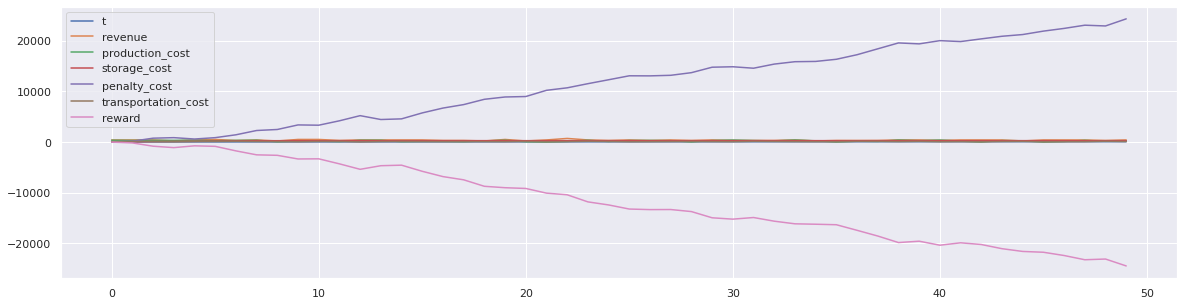

In [84]:
plt.figure(figsize=(20, 5))
plt.plot(costs)
# plt.plot(costs["cumulative_reward"])
plt.legend([col for col in costs.columns])


In [85]:
demands = pd.read_csv("./demands.csv", names=['t', 'demand_0', 'demand_1'])
demands.describe()


,t,demand_0,demand_1
count,50.00000,50.000000,50.000000
mean,24.50000,1.760000,1.840000
std,14.57738,0.743955,0.421852
min,0.00000,1.000000,1.000000
25%,12.25000,1.000000,2.000000
50%,24.50000,2.000000,2.000000
75%,36.75000,2.000000,2.000000
max,49.00000,4.000000,3.000000


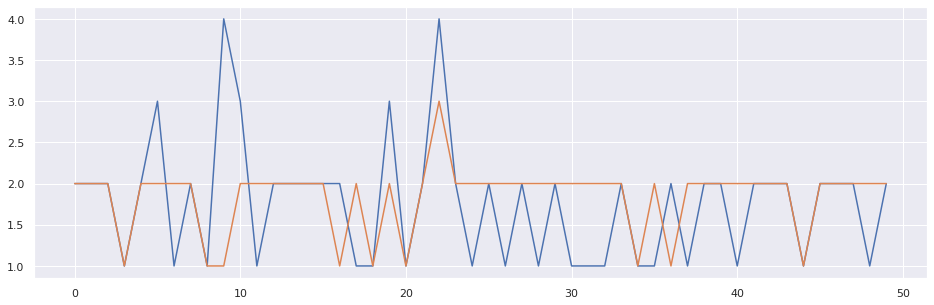

In [96]:

plt.figure(figsize=(16,5))
plt.plot(demands["demand_0"])
plt.plot(demands["demand_1"])


# Tests with Adding Seasonality to the Demand Data

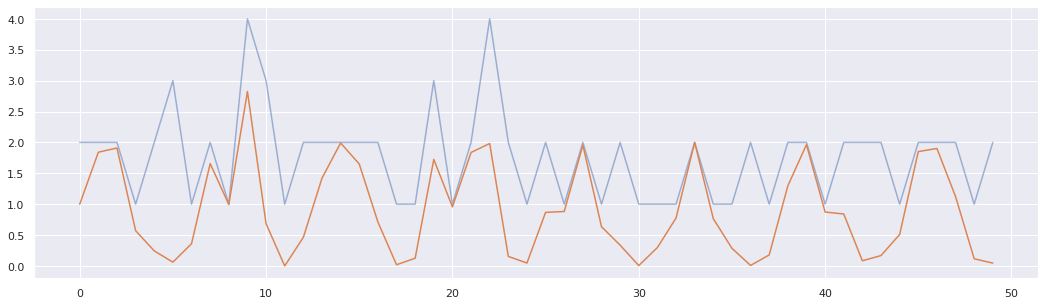

In [87]:
demand_0 = demands["demand_0"].to_numpy()
demand_0_seasonal = demand_0 * np.fromfunction(
    lambda t: 0.5 * (1 + np.sin(t)), demand_0.shape)

plt.figure(figsize=(18, 5))
plt.plot(demand_0, alpha=0.5)
plt.plot(demand_0_seasonal)


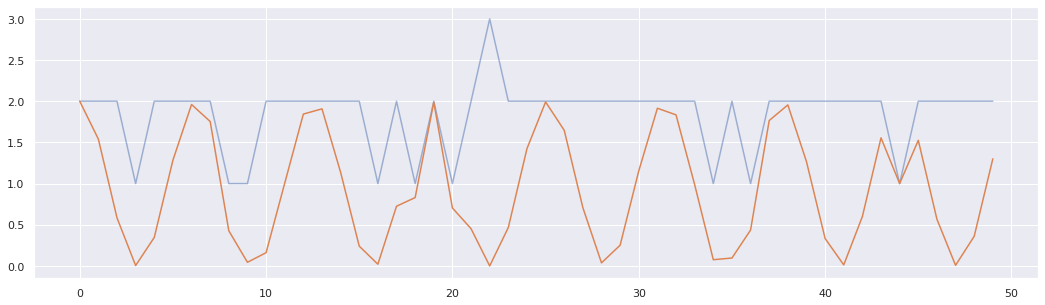

In [88]:
demand_1 = demands["demand_1"].to_numpy()
demand_1_seasonal = demand_1 * np.fromfunction(
    lambda t: 0.5 * (1 + np.cos(t)), demand_1.shape)

plt.figure(figsize=(18, 5))
plt.plot(demand_1, alpha=0.5)
plt.plot(demand_1_seasonal)


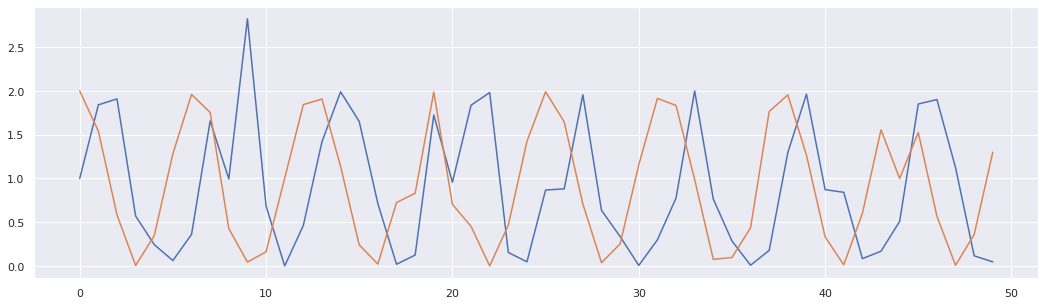

In [89]:
plt.figure(figsize=(18, 5))
plt.plot(demand_0_seasonal)
plt.plot(demand_1_seasonal)


# Join on the available data

In [107]:
compiled = pd.merge(transitions, demands, on='t').drop(columns="reward")
compiled = pd.merge(compiled, costs, on="t")
compiled.describe()


,t,warehouse_num,factory_stock,warehouse_stock_0,warehouse_stock_1,production_level,shippings_to_warehouses_0,shippings_to_warehouses_1,cumulative_reward,demand_0,demand_1,revenue,production_cost,storage_cost,penalty_cost,transportation_cost,reward
count,50.00000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,2.0,-120.414627,18.218063,27.858213,5.283761,5.186811,5.030340,-190661.100829,1.760000,1.840000,360.000000,211.350455,234.821532,11548.123646,76.237460,-11710.533093
std,14.57738,0.0,75.978041,4.340691,5.355489,3.041571,2.567457,3.124401,181976.653220,0.743955,0.421852,94.760708,121.662842,59.194823,7562.028391,29.718260,7584.255239
min,0.00000,2.0,-246.669519,2.054502,4.062346,0.009828,0.305307,0.140800,-585526.654664,1.000000,1.000000,200.000000,0.393105,0.000000,-0.000000,6.522524,-24492.390320
25%,12.25000,2.0,-191.332244,20.000000,28.446853,2.724070,2.735054,2.614826,-323014.809910,1.000000,2.000000,300.000000,108.962798,248.062939,4466.425633,51.585993,-18300.533288
50%,24.50000,2.0,-130.652820,20.000000,30.000000,5.863910,5.133567,5.735881,-134967.579605,2.000000,2.000000,400.000000,234.556389,259.895016,12673.502624,76.639585,-12845.632732
75%,36.75000,2.0,-47.223532,20.000000,30.000000,7.842634,7.125374,7.830164,-28327.821068,2.000000,2.000000,400.000000,313.705373,260.000000,18109.048587,99.236941,-4610.263643
max,49.00000,2.0,-1.540302,20.000000,30.000000,9.712826,9.840112,9.802591,-23.957796,4.000000,3.000000,700.000000,388.513031,260.000000,24320.649886,130.452614,-23.957796


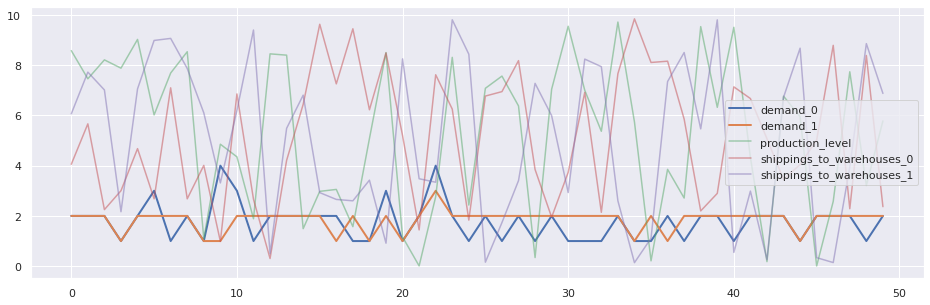

In [91]:
plt.figure(figsize=(16, 5))
plt.plot(compiled["demand_0"], linewidth=2)
plt.plot(compiled["demand_1"], linewidth=2)
plt.plot(compiled["production_level"], alpha=0.5)
plt.plot(compiled["shippings_to_warehouses_0"], alpha=0.5)
plt.plot(compiled["shippings_to_warehouses_1"], alpha=0.5)

plt.legend(["demand_0",
            "demand_1",
            "production_level",
            "shippings_to_warehouses_0",
            "shippings_to_warehouses_1", ])


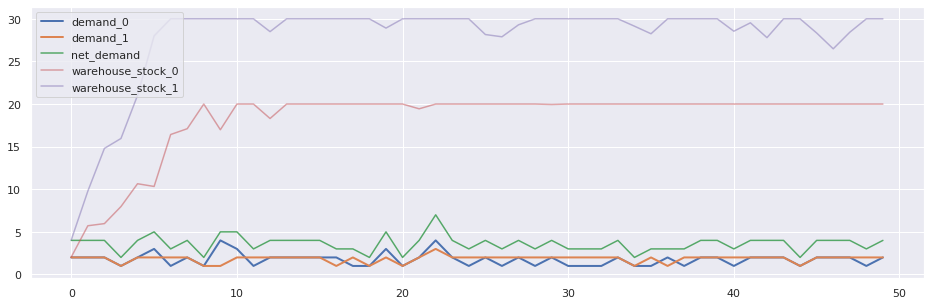

In [92]:
plt.figure(figsize=(16, 5))
plt.plot(compiled["demand_0"], linewidth=2)
plt.plot(compiled["demand_1"], linewidth=2)
plt.plot(compiled["demand_0"] + compiled["demand_1"])
# plt.plot(compiled["factory_stock"], alpha=0.5)
plt.plot(compiled["warehouse_stock_0"], alpha=0.5)
plt.plot(compiled["warehouse_stock_1"], alpha=0.5)

plt.legend(["demand_0",
            "demand_1",
            "net_demand",
            # "factory_stock",
            "warehouse_stock_0",
            "warehouse_stock_1",
            ])
